# Sample Size ($n$) and Correlation ($\hat{\rho}$)

**Summary**: This notebook illustrates the relationship between sample size ($n$), correlation ($\hat{\rho}$), and its standard error by generating data from a multivariate normal distribution with a fixed center and correlation matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## I. Sample Size and Standard Error of Correlation
To demonstrate how the **standard error of correlation ($\hat{\rho}$)** is influenced by changes in sample size, we'll compare how the *variability* of $\hat{\rho}$ differs between smaller and larger sample sizes.

In [2]:
def generate_rho(n, num_samples=400, mean=[0, 0], rho=0.5):
    '''Generates 400 random samples from the same multivariate normal distribution with a sample size of n. 

    Args:
        n (int)           -- sample size of each multivariate normal distribution
        
    Keyword Args:
        num_samples (int) -- number of samples generated
        mean (list)       -- coordinate of population mean
        rho (float)       -- population value of cor(X1, X2)
    
    Returns:
    (list) each sample correlation value
    '''
    cov = [
        [1, rho],
        [rho, 1]
    ]
    
    rho_hats = [0] * num_samples
    np.random.seed(10)

    for i in range(num_samples):
        X = np.random.multivariate_normal(mean, cov, size=n)
        X_cov = (X.T @ X - mean) / n
        rho_hats[i] = X_cov[0][1]
    
    return rho_hats

### Step 1: Generating Samples

Here, we simulate 400 samples of 100 data points and 400 samples of 10,000 data points. Then, we calculate the $\hat{\rho}$ of each sample.

In [3]:
# simulates 400 samples of size of n=100
small_n = 100
small_sample_rho = generate_rho(small_n) # 100 pairwise correlations

# simulates 400 samples of size n=10_000
big_n = 10_000
big_sample_rho = generate_rho(big_n) # 10_000 pairwise correlations

In [4]:
# sanity check
print(f"{len(small_sample_rho)} pairwise correlations, each calculated using 100 random datapoints")
print(f"{len(big_sample_rho)} pairwaise correlations, each calculated using 10_000 random datapoints")

400 pairwise correlations, each calculated using 100 random datapoints
400 pairwaise correlations, each calculated using 10_000 random datapoints


### Step 2: Comparing $\hat{\rho}$ between Smaller (n=100) and Larger (n=10,000) Samples

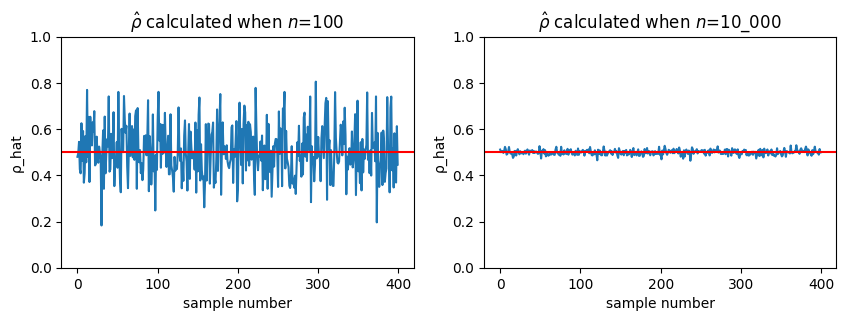

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3)) # plot both rho plots side-by-side
axes[0].plot(small_sample_rho)

axes[0].set(xlabel ='sample number', ylabel = '\u03C1_hat', title =r'$\hat{\rho}$ calculated when $n$=100') # correlation of n = 100 samples
axes[0].set_ylim(0,1)
axes[0].axhline(y=0.5, color='r', linestyle='-', label='\u03C1')

axes[1].plot(big_sample_rho)
axes[1].set(xlabel ='sample number', ylabel = '\u03C1_hat', title =r'$\hat{\rho}$ calculated when $n$=10_000') # correlation of n = 10_000 samples
axes[1].set_ylim(0,1)
axes[1].axhline(y=0.5, color='r', linestyle='-', label='\u03C1')

In [6]:
num_samples = 400
print(f"SE(Correlation) of smaller sample (n={small_n}):  {np.std(small_sample_rho) / np.sqrt(num_samples)}")
print(f"SE(Correlation) of bigger sample (n={big_n}): {np.std(big_sample_rho) / np.sqrt(num_samples)}")

SE(Correlation) of smaller sample (n=100):  0.005683188441615186
SE(Correlation) of bigger sample (n=10000): 0.0005494682031955342


The standard error of the sample correlation calculated between $x_1$ and $x_2$ is about 100 times smaller for the samples with 10,000 data points when compared to the samples with 100 data points. 

In other words, when we scaled $n$ *up* by $100$, the standard error of $\hat{\rho}$ scaled *down* by $\sqrt{100}$.

To explore this relationship between $\hat{\rho}$ and $n$, we can simulate many samples to see how $\hat{\rho}$ changes with $n$.

## II. Sample Size and Correlation

### Step 1: Generating Samples

Here, we simulate many, many random samples of different sizes from the same multivariate normal distribution. 

The first sample is composed of 100 randomly selected points ($n=100$), and for each sample, we increase $n$ by 50, generating up to 5,000 randomly selected points ($n=5000$) per sample.

For each $n$, we simulate 400 samples, find the pairwise correlation ($\hat{\rho}$) between $x_1$ and $x_2$. Then we calculate the standard deviaiton $\sigma(\hat{\rho})$ and divide by $\sqrt{N}$, where $N$ = number of samples = 400.

In [7]:
num_simulations = 98 # 98 total simulations of calculating the standard error
se_sample_rhos = [0] * num_simulations

expected_rho = 0.5 # taken the correlation matrix used to generate samples from multivariate normal distribution
i = 0
for n in range(100, 5_000, 50):
    sample_rhos = generate_rho(n)  # simulate 400 samples with a sample size of n and find rho for each sample
    se_sample_rhos[i] = np.std(sample_rhos) / np.sqrt(num_samples) # calculate the standard error across the 400 rho values
    i += 1 # store the rho values according to sample size (n) in ascending order

### Step 2: Comparing $SE(\hat{\rho})$ between Smaller (n=100) and Larger (n=10,000) Samples

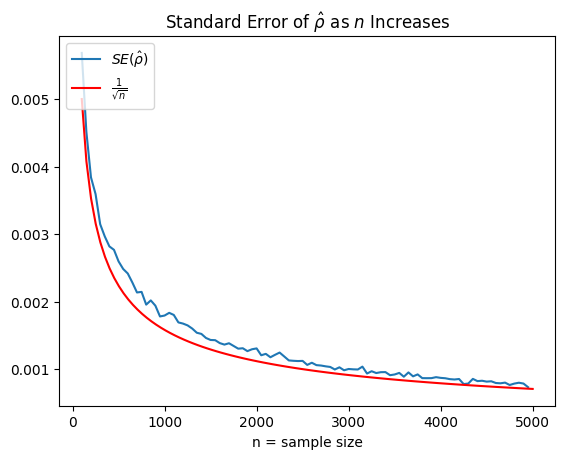

In [8]:
plt.plot(range(100, 5_000, 50), se_sample_rhos, label=r'$SE(\hat{\rho})$') # simulated estimated standard error
ax = plt.gca()
n_values = np.linspace(100, 5000, 98)
y_values = 1 / np.sqrt(n_values) / np.sqrt(num_samples) # scaled standard error
ax.plot(n_values, y_values, color='red', linestyle='-', label=r'$\frac{1}{\sqrt{n}}$') # plot scaled standard error

plt.xlabel('n = sample size') 
plt.title(r'Standard Error of $\hat{\rho}$ as $n$ Increases') 
plt.legend(loc='upper left')

As we can see, the correlation ($\hat{\rho}$) between $x_1$ and $x_2$ for each sample varies less from its ***expected value*** $\rho$ as $n$ increases. 

## Results

When calculating correlation values to understand the functional connectivity of the brain, larger sample sizes will generate correlation values that on average, have less variablity from the true correlation values. Standard error can be used to identify interesting activity between two brain regions when estimating functional connectivity.